In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
avocado_info = pd.read_csv('avocado_info.csv')
list(avocado_info.columns.values)

['Growth Duration', 'Fertilizer']

In [9]:
fertilized = avocado_info.loc[avocado_info['Fertilizer'] == True]
not_fertilized = avocado_info.loc[avocado_info['Fertilizer'] == False]

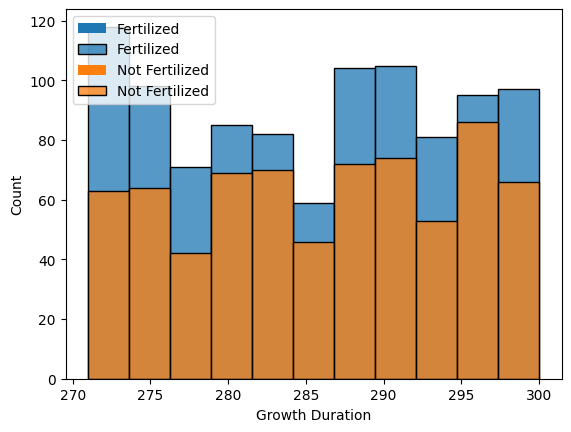

In [17]:
sn.histplot(fertilized['Growth Duration'], kde = False, label = 'Fertilized')
sn.histplot(not_fertilized['Growth Duration'], kde = False, label = 'Not Fertilized')

plt.legend()

plt.show()

In [18]:
observed_test_stat = np.mean(fertilized['Growth Duration'] - np.mean(not_fertilized['Growth Duration']))

In [19]:
observed_test_stat

-0.6100359955807343

In [20]:
avocado_info['Growth Duration'].sample(frac = 1)

430     272
514     289
703     272
1100    276
1044    290
       ... 
1147    288
1036    290
1468    274
690     287
1172    292
Name: Growth Duration, Length: 1700, dtype: int64

In [21]:
avocado_info['Growth Duration'].sample(frac = 1).reset_index()

,index,Growth Duration
0,122,294
1,1409,295
2,1345,289
3,36,293
4,236,294
...,...,...
1695,1110,283
1696,108,296
1697,505,278
1698,1387,300


In [22]:
avocado_info['Growth Duration'].sample(frac = 1).reset_index(drop = True)

0       274
1       296
2       285
3       273
4       278
       ... 
1695    295
1696    296
1697    280
1698    278
1699    299
Name: Growth Duration, Length: 1700, dtype: int64

In [23]:
def perm(data):
    return data.sample(frac = 1).reset_index(drop = True)

In [24]:
sim_test_stat = np.array([])

reps = 10000

for i in range(reps):
    perm_info = perm(avocado_info['Growth Duration'])
    
    df = pd.DataFrame({'Permuted Duration': perm_info, 'Fertilizer': avocado_info['Fertilizer']})
    
    fertilized = df.loc[df['Fertilizer'] == True, 'Permuted Duration']
    not_fertilized = df.loc[df['Fertilizer'] == False, 'Permuted Duration']
    
    stat = np.mean(fertilized) - np.mean(not_fertilized)
    
    sim_test_stat = np.append(sim_test_stat, stat)

In [27]:
sim_test_stat

array([ 0.01279447,  0.18001354, -0.55914323, ..., -0.0720268 ,
        0.53383941,  0.52656902])

In [28]:
p_value = np.count_nonzero(sim_test_stat <= observed_test_stat) / reps

In [29]:
p_value

0.0759

In [30]:
fertilized = avocado_info.loc[avocado_info['Fertilizer'] == True, 'Growth Duration']
not_fertilized = avocado_info.loc[avocado_info['Fertilizer'] == False, 'Growth Duration']

In [31]:
np.random.choice(fertilized, size = len(fertilized))

array([279, 272, 272, 273, 293, 275, 292, 271, 273, 273, 281, 276, 272,
       291, 280, 288, 284, 299, 275, 275, 289, 289, 293, 278, 278, 271,
       296, 294, 300, 299, 287, 289, 274, 295, 271, 275, 275, 275, 282,
       299, 292, 274, 300, 288, 291, 293, 283, 281, 275, 298, 298, 275,
       277, 281, 272, 295, 276, 295, 276, 294, 278, 288, 271, 300, 278,
       277, 280, 291, 283, 286, 300, 286, 274, 282, 272, 287, 277, 282,
       292, 283, 296, 298, 296, 278, 273, 277, 271, 280, 294, 294, 299,
       278, 273, 280, 274, 273, 273, 282, 300, 278, 277, 283, 271, 295,
       290, 287, 275, 290, 297, 298, 275, 271, 279, 297, 300, 294, 279,
       286, 286, 274, 293, 295, 290, 278, 294, 283, 294, 294, 297, 282,
       272, 283, 275, 297, 273, 280, 273, 286, 287, 274, 292, 295, 295,
       299, 300, 283, 288, 289, 290, 297, 295, 273, 292, 275, 282, 288,
       290, 286, 275, 292, 287, 295, 296, 291, 298, 271, 274, 282, 275,
       272, 300, 285, 279, 274, 288, 275, 285, 290, 272, 281, 29

In [32]:
np.random.choice(not_fertilized, size = len(not_fertilized))

array([297, 278, 286, 287, 298, 278, 275, 280, 277, 276, 272, 292, 286,
       278, 289, 283, 296, 288, 280, 296, 281, 281, 290, 281, 272, 286,
       288, 287, 291, 273, 274, 287, 273, 296, 291, 281, 283, 280, 300,
       296, 290, 296, 271, 291, 290, 285, 287, 283, 271, 277, 276, 277,
       296, 278, 294, 276, 286, 300, 288, 290, 284, 281, 279, 290, 283,
       275, 286, 298, 297, 274, 284, 284, 298, 278, 272, 291, 294, 296,
       282, 276, 294, 290, 290, 297, 292, 284, 288, 275, 271, 290, 271,
       300, 280, 291, 277, 297, 300, 293, 275, 284, 297, 277, 279, 295,
       286, 277, 285, 281, 294, 275, 295, 287, 282, 272, 300, 282, 284,
       285, 277, 294, 281, 294, 294, 272, 294, 299, 284, 292, 297, 290,
       289, 299, 292, 273, 271, 279, 274, 274, 280, 286, 297, 297, 291,
       296, 291, 293, 299, 295, 295, 277, 290, 282, 283, 296, 280, 296,
       284, 296, 280, 277, 275, 280, 286, 294, 276, 299, 272, 285, 280,
       279, 293, 298, 292, 295, 277, 290, 291, 276, 276, 285, 29

In [34]:
def resample(orig_sample):
    return np.random.choice(orig_sample, size = len(orig_sample))

In [37]:
def bootstrap(orig_sample, reps):
    means = np.array([])
    
    for i in range(reps):
        new_sample = resample(orig_sample)
        
        new_mean = np.mean(new_sample)
        
        means = np.append(means, new_mean)
        
    return means

In [40]:
fertilized_means = bootstrap(fertilized, 10000)

not_fertilized_means = bootstrap(not_fertilized, 10000)

estimates = fertilized_means - not_fertilized_means


In [41]:
estimates

array([-0.85677323, -0.30050964, -0.36121031, ..., -0.68638227,
       -0.92830821, -0.96024805])

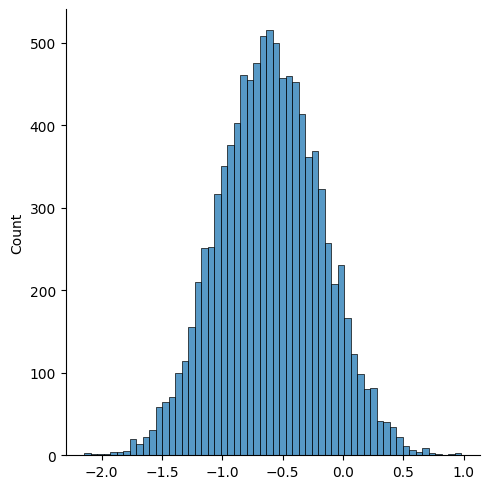

In [43]:
sn.displot(estimates, kde = False)
plt.show()

In [44]:
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(-1.425875476674163, 0.23237517374102623)